In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# Cumulative returns

In [2]:
def CumRet(Rets,StartDate=None,EndDate=None):
    # Rets is a pandas Series or DataFrame indexed by Datetime. Returns like object.    
    Rt = Rets.loc[StartDate:EndDate]   
    CRet = (1+Rt).cumprod()-1
    return(CRet)   

# S&P 500 Total Return

In [3]:
# Read data and convert to convenient form
sptr = pd.read_csv("SPTR.csv")                         # S&P 500 Total Return month-end index values
sptr = sptr.set_index(pd.to_datetime(sptr['Date']))    # Converting Date column to datetime index
sptr.drop(columns='Date', inplace=True)

#sptr.info()
#sptr.head()
sptr['Return'] = sptr['SPTR'].pct_change()
sptr['CumReturn'] = CumRet(sptr['Return'])

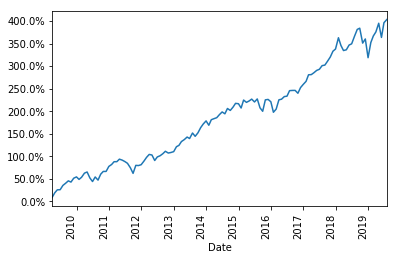

In [4]:
MRet = sptr['Return'].loc['2009-03-01':]     # Monthly returns since the beginning of 2007
CRet = CumRet(MRet)

fig,a1 = plt.subplots()
_=CRet.plot(ax=a1,rot=90)

_=a1.set_yticklabels(['{:,.1%}'.format(y) for y in a1.get_yticks()])
plt.show()

In [5]:
# Calculating an annualized return. Illustrates useful date calculations.

sdate,edate = CRet.index[0], CRet.index[-1]
ndays = edate-sdate
nyears = (edate-sdate)/np.timedelta64(1,'Y')
AnnRet = (1+CRet[-1])**(1/nyears) - 1

ndays,nyears,AnnRet

(Timedelta('3774 days 00:00:00'), 10.332861044374628, 0.1694729748221957)

## Plotting with plotly

In [9]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

In [7]:
MRet = sptr['Return'].loc['2009-03-01':]     # Monthly returns since the beginning of  March 2009
CRet = CumRet(MRet)

data = [go.Scatter(x=CRet.index,y=CRet)]
layout = go.Layout(title = dict(text='S&P 500 Total Return',xref="paper",x=0.5),
                   yaxis=dict(tickformat='.1%',title='Cumulative Return'))

pFig = go.Figure(data,layout)

plotly.offline.iplot(pFig)

# Adding EAFE and EM returns

In [8]:
msci = pd.read_csv("MSCI.csv")
msci = msci.set_index(pd.to_datetime(msci['Date']))
msci.drop(columns='Date',inplace=True)


In [9]:
# Computing returns in one DataFrame
ILevels = msci.merge(sptr['SPTR'],how='left',left_index=True,right_index=True) # All 3 index levels

IReturns = ILevels.pct_change()
#ICumRets = (1+IReturns.loc['2009-03-01':None]).cumprod()-1
ICumRets = CumRet(IReturns,StartDate='2009-03-01')

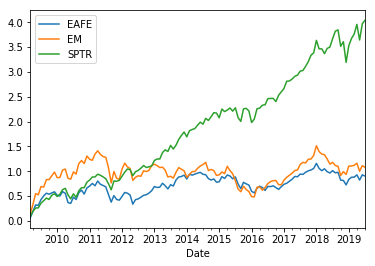

In [10]:
_=ICumRets.plot()   # pandas plot functionality

In [11]:
pdata = [{'x':ICumRets.index,'y':ICumRets[col],'name':col} for col in ICumRets.columns]

layout = go.Layout(title = dict(text='Equity Index Returns',xref="paper",x=0.5),
                   yaxis=dict(tickformat='.1%',title='Cumulative Return'))

pFig2 = go.Figure(pdata,layout)

plotly.offline.iplot(pFig2)

# Autocorrelation

In [4]:
import statsmodels.tsa.stattools as st

In [5]:
sptr.head()

,SPTR,Return,CumReturn
Date,,,
1986-06-30,239.04,NaN,NaN
1986-07-31,225.67,-0.055932,-0.055932
1986-08-29,242.40,0.074135,0.014056
1986-09-30,222.36,-0.082673,-0.069779
1986-10-31,235.19,0.057699,-0.016106


In [21]:
x = sptr['Return'].iloc[1:]     # Return[0] is NaN

Lags=10
xacf = st.acf(x,nlags=Lags)

pdata = [go.Scatter(x=list(range(Lags)),y=xacf,mode='markers+lines')]
plotly.offline.iplot(pdata)
                    

In [20]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])